In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import ufss
import os

In [3]:
# DiagramGenerator class, or DG for short
DG = ufss.DiagramGenerator

In [7]:
# re for rephasing
re = DG() # DG takes a single key-word argument, which has the default value detection_type = 'polarization'

# 2DPE example of phase-matching
re.set_phase_discrimination([(0,1),(1,0),(1,0)])

# Set the pulse durations for pulses 0,1,2 and the local oscillator
d0 = 2
d1 = 4
d2 = 4

# Set the pulse intervals
t0 = np.array([-d0/2,d0/2])
t1 = np.array([-d1/2,d1/2])
t2 = np.array([-d2/2,d2/2])
all_pulse_intervals = [t0,t1,t2]

# These pulse intervals are given to DG by setting DG's efield_times attribute
re.efield_times = all_pulse_intervals

In [8]:
# nr for non-rephasing
nr = DG() # DG takes a single key-word argument, which has the default value detection_type = 'polarization'

# 2DPE example of phase-matching
nr.set_phase_discrimination([(1,0),(0,1),(1,0)])

# These pulse intervals are given to DG by setting DG's efield_times attribute
nr.efield_times = all_pulse_intervals

In [9]:
# rephasing-type eei2d
eei2d_re = DG() # DG takes a single key-word argument, which has the default value detection_type = 'polarization'

# 2DPE example of phase-matching
eei2d_re.set_phase_discrimination([(0,2),(2,0),(1,0)])

# These pulse intervals are given to DG by setting DG's efield_times attribute
eei2d_re.efield_times = all_pulse_intervals

In [10]:
# non-rephasing-type eei2d
eei2d_nr = DG() # DG takes a single key-word argument, which has the default value detection_type = 'polarization'

# 2DPE example of phase-matching
eei2d_re.set_phase_discrimination([(2,0),(0,2),(1,0)])

# These pulse intervals are given to DG by setting DG's efield_times attribute
eei2d_re.efield_times = all_pulse_intervals

## Rephasing 2D photon echo

In [26]:
all_re = re.get_diagrams([0,0,20])
re_ground_state_population = re.filter_diagrams_by_excitation_manifold(all_re,manifold=0,number_of_interactions=2)
re_singly_excited_population = re.filter_diagrams_by_excitation_manifold(all_re,manifold=1,number_of_interactions=2)

# anything that has ground state population will be a ground-state bleach (gsb) diagram
re_gsb = re_ground_state_population

# singly-excited population can be stimulated emission (se) or excited-state absorption (esa)

# for se processes, after the final interaction, the ket-side will be in the singly-excited state,
# and the bra-side will be in the ground-state
se_state = [1,0] # [ket_manifold_index, bra_manifold_index]
re_se = re.filter_diagrams_by_final_state(re_singly_excited_population,[1,0])

# for esa processes, after the final interaction, the ket-side will be in the doubly-excited state,
# and the bra-side will be in the singly-excited-state
esa_state = [2,1]
re_esa = re.filter_diagrams_by_final_state(re_singly_excited_population,[2,1])


# alternatively we can pull the se and esa apart by overall sign of the diagram:
se_sign = -1
re_se2 = re.filter_diagrams_by_sign(re_singly_excited_population,sign=se_sign)

esa_sign = 1
re_esa2 = re.filter_diagrams_by_sign(re_singly_excited_population,sign=esa_sign)

print(re_se2 == re_se)
print(re_esa2 == re_esa)

True
True


In [27]:
print('GSB',re_gsb,'\n','SE',re_se,'\n','ESA',re_esa)

GSB [(('Ku', 1), ('Kd', 0), ('Ku', 2)), (('Bu', 0), ('Bd', 1), ('Ku', 2))] 
 SE [(('Ku', 1), ('Bu', 0), ('Bd', 2)), (('Bu', 0), ('Ku', 1), ('Bd', 2))] 
 ESA [(('Ku', 1), ('Bu', 0), ('Ku', 2)), (('Bu', 0), ('Ku', 1), ('Ku', 2))] 



GSB


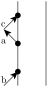

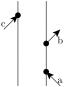

SE


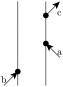

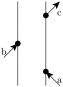

ESA


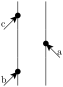

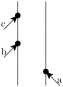

In [28]:
print('GSB')
re.display_diagrams(re_gsb)
print('SE')
re.display_diagrams(re_se)
print('ESA')
re.display_diagrams(re_esa)

## EEI2D (rephasing type)

In [47]:
all_eei2d_re = eei2d_re.get_diagrams([0,10,20])

# The first step is to filter the diagrams into those that spend the population time in the ground state manifold
eei2d_re_ground_state_population = eei2d_re.filter_diagrams_by_excitation_manifold(all_eei2d_re,manifold=0,
                                                                                   number_of_interactions=4)
# in the singly-excited manifold
eei2d_re_singly_excited_population = eei2d_re.filter_diagrams_by_excitation_manifold(all_eei2d_re,manifold=1,
                                                                                     number_of_interactions=4)

# and in the doubly-excited manifold
eei2d_re_doubly_excited_population = eei2d_re.filter_diagrams_by_excitation_manifold(all_eei2d_re,manifold=2,
                                                                                     number_of_interactions=4)

# anything that has ground state population will be a ground-state bleach (gsb) diagram
eei2d_re_gsb = eei2d_re_ground_state_population

# singly-excited population can be stimulated emission (se) or excited-state absorption (esa)

# for se processes, after the final interaction, the ket-side will be in the singly-excited state,
# and the bra-side will be in the ground-state
se_state_type1 = [1,0] # [ket_manifold_index, bra_manifold_index]
eei2d_re_se_type1 = re.filter_diagrams_by_final_state(eei2d_re_singly_excited_population,se_state_type1)

# for esa processes, after the final interaction, the ket-side will be in the doubly-excited state,
# and the bra-side will be in the singly-excited-state
esa_state_type1 = [2,1]
eei2d_re_esa_type1 = re.filter_diagrams_by_final_state(eei2d_re_singly_excited_population,esa_state_type1)

# for se processes, after the final interaction, the ket-side will be in the singly-excited state,
# and the bra-side will be in the ground-state
se_state_type2 = [2,1] # [ket_manifold_index, bra_manifold_index]
eei2d_re_se_type2 = re.filter_diagrams_by_final_state(eei2d_re_doubly_excited_population,se_state_type2)

# for esa processes, after the final interaction, the ket-side will be in the doubly-excited state,
# and the bra-side will be in the singly-excited-state
esa_state_type2 = [3,2]
eei2d_re_esa_type2 = re.filter_diagrams_by_final_state(eei2d_re_doubly_excited_population,esa_state_type2)


# alternatively we can pull the se and esa apart by overall sign of the diagram, in which case we don't 
# need to distinguish between type 1 and type 2 (though we could if we wanted to)
eei2d_re_all_excited_population = eei2d_re_singly_excited_population + eei2d_re_doubly_excited_population
se_sign = -1
eei2d_re_all_se = eei2d_re.filter_diagrams_by_sign(eei2d_re_all_excited_population,sign=se_sign)

esa_sign = 1
eei2d_re_all_esa = eei2d_re.filter_diagrams_by_sign(eei2d_re_all_excited_population,sign=esa_sign)

print(eei2d_re_all_se == eei2d_re_se_type1 + eei2d_re_se_type2)
print(eei2d_re_all_esa == eei2d_re_esa_type1 + eei2d_re_esa_type2)

False
False


In [50]:
print('GSB',eei2d_re_gsb,'\n','SE',eei2d_re_se_type1,'\n',eei2d_re_se_type2,'\n','ESA',eei2d_re_esa_type1,'\n',eei2d_re_esa_type2)

GSB [(('Ku', 0), ('Ku', 0), ('Kd', 1), ('Kd', 1), ('Ku', 2))] 
 SE [(('Ku', 0), ('Ku', 0), ('Bu', 1), ('Kd', 1), ('Bd', 2)), (('Ku', 0), ('Ku', 0), ('Kd', 1), ('Bu', 1), ('Bd', 2))] 
 [(('Ku', 0), ('Ku', 0), ('Bu', 1), ('Bu', 1), ('Bd', 2))] 
 ESA [(('Ku', 0), ('Ku', 0), ('Bu', 1), ('Kd', 1), ('Ku', 2)), (('Ku', 0), ('Ku', 0), ('Kd', 1), ('Bu', 1), ('Ku', 2))] 
 [(('Ku', 0), ('Ku', 0), ('Bu', 1), ('Bu', 1), ('Ku', 2))]
